In [1]:
!pip install pandas numpy scikit-learn matplotlib tensorflow

Loaded 741 data points from 7-day data
Date range: 2025-05-21 23:00:00+00:00 to 2025-06-21 23:00:00+00:00

Preprocessing data...
Created 677 sequences with window size 60 and horizon 5
Training samples: 432
Validation samples: 109
Test samples: 136

Building LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,741 (518.52 KB)

 Trainable params: 132,741 (518.52 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.2027 - mae: 0.3753 - val_loss: 0.0136 - val_mae: 0.0900 - learning_rate: 0.0010
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0316 - mae: 0.1332 - val_loss: 0.0047 - val_mae: 0.0498 - learning_rate: 0.0010
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151 - mae: 0.0892 - val_loss: 0.0035 - val_mae: 0.0433 - learning_rate: 0.0010
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mae: 0.0733 - val_loss: 0.0043 - val_mae: 0.0492 - learning_rate: 0.0010
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0110 - mae: 0.0734 - val_loss: 0.0031 - val_mae: 0.0404 - learning_rate: 0.0010
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mae: 0.0682 - val_loss: 0.0047 - val_mae: 0.0515 - learning_rate: 0.0010
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mae: 0.0705 - val_loss: 0.0028 - val_mae: 0.0372 - learning_

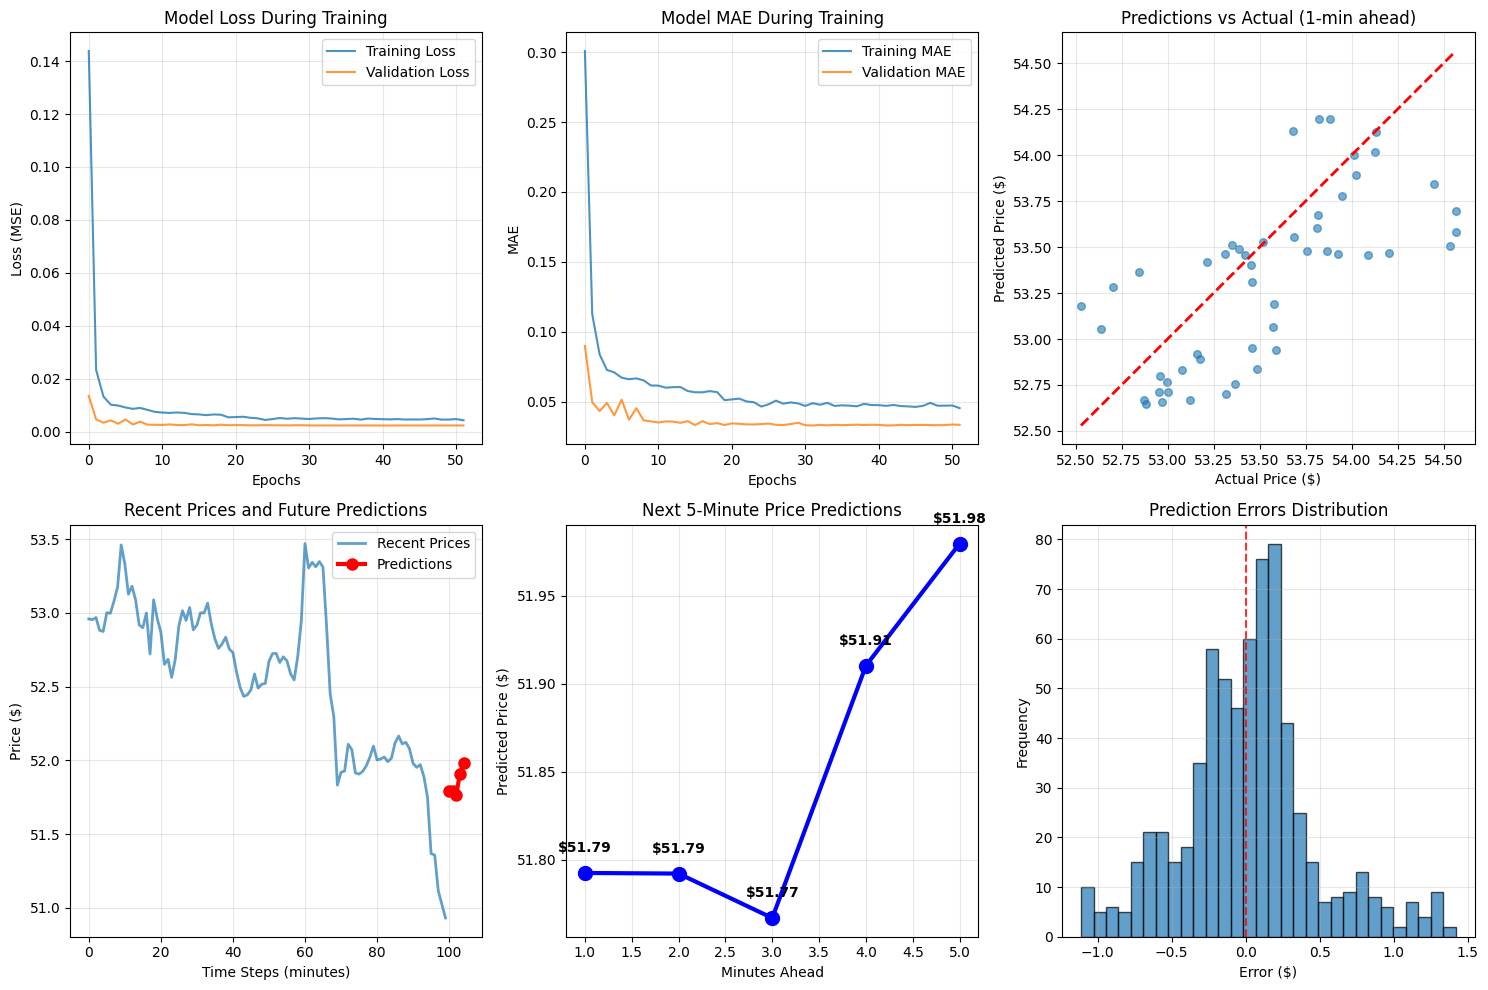


Model weights saved to 'lstm_7day_model.weights.h5'
Scaler saved to 'price_scaler.pkl'

ADDITIONAL ANALYSIS

Calculating prediction uncertainty...
Predictions with uncertainty:
Minute 1: $51.81 ± $0.11 (95% CI: $51.70 - $51.92)
Minute 2: $51.80 ± $0.10 (95% CI: $51.71 - $51.90)
Minute 3: $51.79 ± $0.12 (95% CI: $51.67 - $51.91)
Minute 4: $51.91 ± $0.14 (95% CI: $51.77 - $52.05)
Minute 5: $51.98 ± $0.11 (95% CI: $51.87 - $52.10)

Model trained on 741 data points from 7-day period
Final model performance: RMSE = $0.45, MAPE = 0.64%


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# === LOAD DATA ===
df_week = pd.read_csv("7day_data.csv", parse_dates=["timestamp"])

# Sort by timestamp to ensure proper sequence
df_week = df_week.sort_values('timestamp')

print(f"Loaded {len(df_week)} data points from 7-day data")
print(f"Date range: {df_week['timestamp'].min()} to {df_week['timestamp'].max()}")

# === FUNCTION: Create Sequences ===
def create_sequences(data, window_size, horizon):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + horizon])
    return np.array(X), np.array(y)

# === DATA PREPROCESSING ===
print("\nPreprocessing data...")

# Scale the data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(df_week["price"].values.reshape(-1, 1)).flatten()

# Create sequences for prediction
window_size = 60  # Look back 60 minutes
horizon = 5       # Predict next 5 minutes

X, y = create_sequences(prices_scaled, window_size, horizon)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Created {X.shape[0]} sequences with window size {window_size} and horizon {horizon}")

# Split data (use temporal split to avoid data leakage)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Further split training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=False
)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

# === BUILD MODEL ===
print("\nBuilding LSTM model...")

model = Sequential([
    LSTM(128, input_shape=(window_size, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(horizon)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("Model Architecture:")
model.summary()

# === TRAIN MODEL ===
print("\nTraining model...")

# Add early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# === EVALUATE MODEL ===
print("\nEvaluating model...")

# Test set evaluation
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")

# Make predictions on test set
test_predictions = model.predict(X_test, verbose=0)

# Inverse transform predictions and actual values
test_predictions_real = scaler.inverse_transform(test_predictions.reshape(-1, 1)).reshape(test_predictions.shape)
test_actual_real = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

# Calculate additional metrics
rmse = np.sqrt(np.mean((test_actual_real - test_predictions_real) ** 2))
mape = np.mean(np.abs((test_actual_real - test_predictions_real) / test_actual_real)) * 100

print(f"Test RMSE: ${rmse:.2f}")
print(f"Test MAPE: {mape:.2f}%")

# === MAKE FUTURE PREDICTIONS ===
print("\nMaking future predictions...")

# Use the last window from the data for prediction
if len(prices_scaled) >= window_size:
    latest_window = prices_scaled[-window_size:].reshape(1, window_size, 1)
    pred_scaled = model.predict(latest_window, verbose=0)

    # Inverse transform predictions
    pred_real = scaler.inverse_transform(pred_scaled.reshape(-1, 1)).flatten()

    print("Predicted next 5 minutes of price:")
    for i, price in enumerate(pred_real, 1):
        print(f"Minute {i}: ${price:.2f}")

    # Get the actual last few prices for context
    last_actual_prices = scaler.inverse_transform(prices_scaled[-10:].reshape(-1, 1)).flatten()
    current_price = last_actual_prices[-1]

    print(f"\nCurrent price: ${current_price:.2f}")
    print(f"Predicted trend: {('UP' if pred_real[0] > current_price else 'DOWN')}")
    print(f"5-minute change: ${pred_real[-1] - current_price:.2f} ({((pred_real[-1] - current_price) / current_price * 100):+.2f}%)")

# === VISUALIZATION ===
print("\nCreating visualizations...")

plt.figure(figsize=(15, 10))

# Plot 1: Training history
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', alpha=0.8)
plt.plot(history.history['val_loss'], label='Validation Loss', alpha=0.8)
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: MAE history
plt.subplot(2, 3, 2)
plt.plot(history.history['mae'], label='Training MAE', alpha=0.8)
plt.plot(history.history['val_mae'], label='Validation MAE', alpha=0.8)
plt.title('Model MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Test predictions vs actual
plt.subplot(2, 3, 3)
# Show first 50 test predictions for clarity
sample_size = min(50, len(test_predictions_real))
sample_predictions = test_predictions_real[:sample_size, 0]  # First minute predictions
sample_actual = test_actual_real[:sample_size, 0]

plt.scatter(sample_actual, sample_predictions, alpha=0.6, s=30)
plt.plot([sample_actual.min(), sample_actual.max()],
         [sample_actual.min(), sample_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Predictions vs Actual (1-min ahead)')
plt.grid(True, alpha=0.3)

# Plot 4: Recent price history and predictions
plt.subplot(2, 3, 4)
recent_prices = scaler.inverse_transform(prices_scaled[-100:].reshape(-1, 1)).flatten()
plt.plot(range(len(recent_prices)), recent_prices, label='Recent Prices', alpha=0.7, linewidth=2)

# Add predictions
pred_x = range(len(recent_prices), len(recent_prices) + len(pred_real))
plt.plot(pred_x, pred_real, 'ro-', label='Predictions', markersize=8, linewidth=3)

plt.title('Recent Prices and Future Predictions')
plt.xlabel('Time Steps (minutes)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Prediction details
plt.subplot(2, 3, 5)
minutes = range(1, len(pred_real) + 1)
plt.plot(minutes, pred_real, 'bo-', markersize=10, linewidth=3)
plt.title("Next 5-Minute Price Predictions")
plt.xlabel("Minutes Ahead")
plt.ylabel("Predicted Price ($)")
plt.grid(True, alpha=0.3)

# Add value labels on points
for i, price in enumerate(pred_real):
    plt.annotate(f'${price:.2f}', (i+1, price), textcoords="offset points",
                xytext=(0,15), ha='center', fontweight='bold')

# Plot 6: Prediction errors distribution
plt.subplot(2, 3, 6)
errors = (test_predictions_real - test_actual_real).flatten()
plt.hist(errors, bins=30, alpha=0.7, edgecolor='black')
plt.title('Prediction Errors Distribution')
plt.xlabel('Error ($)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === SAVE MODEL ===
model.save_weights("lstm_7day_model.weights.h5")
print("\nModel weights saved to 'lstm_7day_model.weights.h5'")

# Save scaler for future use
import joblib
joblib.dump(scaler, 'price_scaler.pkl')
print("Scaler saved to 'price_scaler.pkl'")

# === ADDITIONAL ANALYSIS ===
print("\n" + "="*50)
print("ADDITIONAL ANALYSIS")
print("="*50)

# Prediction confidence intervals (simple approach)
# Make multiple predictions with dropout enabled during inference
print("\nCalculating prediction uncertainty...")

# Enable dropout during inference for uncertainty estimation
def predict_with_uncertainty(model, X, n_samples=100):
    # This is a simplified approach - in practice, you'd use more sophisticated methods
    predictions = []
    for _ in range(n_samples):
        pred = model(X, training=True)  # Keep dropout active
        predictions.append(pred.numpy())

    predictions = np.array(predictions)
    mean_pred = np.mean(predictions, axis=0)
    std_pred = np.std(predictions, axis=0)

    return mean_pred, std_pred

# Get uncertainty estimates for the latest prediction
mean_pred, std_pred = predict_with_uncertainty(model, latest_window)
mean_pred_real = scaler.inverse_transform(mean_pred.reshape(-1, 1)).flatten()
std_pred_real = std_pred.flatten() * (scaler.data_max_[0] - scaler.data_min_[0])

print("Predictions with uncertainty:")
for i, (mean_price, std_price) in enumerate(zip(mean_pred_real, std_pred_real), 1):
    lower_bound = mean_price - 1.96 * std_price  # 95% confidence interval
    upper_bound = mean_price + 1.96 * std_price
    print(f"Minute {i}: ${mean_price:.2f} ± ${1.96*std_price:.2f} (95% CI: ${lower_bound:.2f} - ${upper_bound:.2f})")

print(f"\nModel trained on {len(df_week)} data points from 7-day period")
print(f"Final model performance: RMSE = ${rmse:.2f}, MAPE = {mape:.2f}%")